In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Handling missing values**

### **Missing values can be treated in two ways: 1. Removing them , 2. Imputing them**

### **Imputation:**
> * #### **Univariate:**
>> * **Numerical values:**
>>> * Mean/ Median imputation
>>> * Random imputation
>>> * End of distribution imputation
>> * **Categorical values:**
>>> * Imputation with mode
>>> * Imputation with the word "missing"

> * #### **Multivariate:**
>> * KNN imputer
>> * Iterative imputer & MICE

## **Numerical values**

### **Mean/Median imputation**
> * When data is almost normally distributed, we can use mean imputation.
* We can use median imputation when the data is skewed.

#### **Disadvantages**
> * Distribution shape can change
* Addition of extra outliers
* Change in correlation/covariance between columns

**USED:** When data is Missing Completely at random (MCAR) and missing values are less than 5%

In [2]:
df = pd.read_csv('titanic/train.csv')
df = df[['Age','Fare','Survived']]
for i in range(1,800,80):
  df['Fare'][i] = None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [3]:
df.shape

(891, 3)

In [4]:
df.head(4)

,Age,Fare,Survived
0,22.0,7.250,0
1,38.0,NaN,1
2,26.0,7.925,1
3,35.0,53.100,1


In [5]:
df.isnull().mean()*100

Age         19.865320
Fare         1.122334
Survived     0.000000
dtype: float64

In [6]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()

mean_fare = df['Fare'].mean()
median_fare = df['Fare'].median()

mean_age,median_age,mean_fare,median_fare

(29.69911764705882, 28.0, 32.328853802497136, 14.4542)

### **Mean and median imputation using pandas**

In [7]:
df['Age_mean'] = df['Age'].fillna(mean_age)
df['Age_median'] = df['Age'].fillna(median_age)

df['Fare_mean'] = df['Fare'].fillna(mean_age)
df['Fare_median'] = df['Fare'].fillna(median_age)

**Examine change in variance**

In [8]:
print("Variance of Age")
print("Before: ",df['Age'].var())
print("After mean imputation : ",df['Age_mean'].var())
print("After median imputation : ",df['Age_median'].var())

Variance of Age
Before:  211.0191247463081
After mean imputation :  169.05239993721085
After median imputation :  169.51249827942328


In [9]:
print("Variance of Fare")
print("Before: ",df['Fare'].var())
print("After mean imputation : ",df['Fare_mean'].var())
print("After median imputation : ",df['Fare_median'].var())

Variance of Fare
Before:  2489.0701387580325
After mean imputation :  2461.17988885143
After median imputation :  2461.3112457525144


#### **Variance changes drastically in case of age but slightly in case of fare column.**

**Examine change in distribution**

**PLot distribution**

In [10]:
def plot_dist(col1,col2,col3,name1,name2,name3):
  fig = plt.figure(figsize=(8,5))
  ax=fig.add_subplot(111)

  sns.kdeplot(df[col1],ax=ax)
  sns.kdeplot(df[col2],ax=ax)
  sns.kdeplot(df[col3],ax=ax)

  plt.legend([name1,name2,name3])

  plt.show()

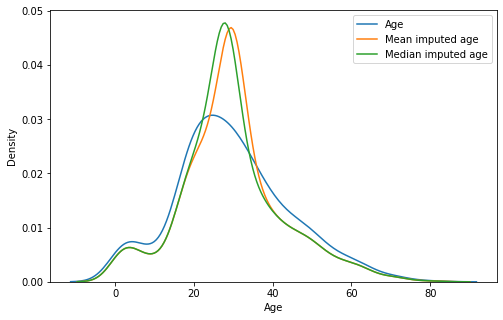

In [11]:
plot_dist('Age','Age_mean','Age_median','Age','Mean imputed age', 'Median imputed age')

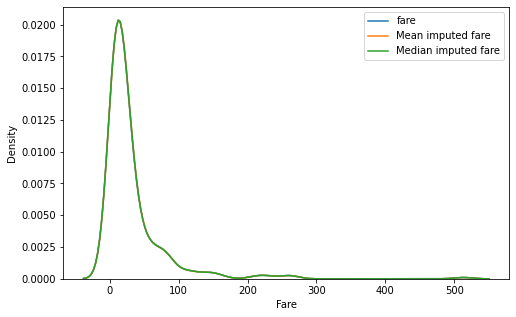

In [12]:
plot_dist('Fare','Fare_mean','Fare_median','fare','Mean imputed fare', 'Median imputed fare')

#### **Distribution shape changes on imputation.**

### **Conclusion: We can impute the 'Fare' column with mean/median but not the 'Age' column**

#### **Distribution shape doesnot change**

### **Boxplot to examine addition of outliers**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


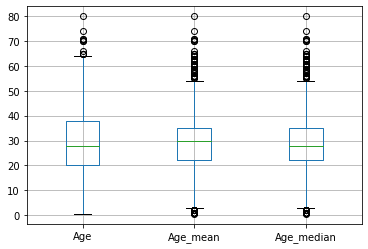

In [13]:
df[['Age','Age_mean','Age_median']].boxplot()
plt.show()

**Inter quartile range shrinks a lot in this case, due to which the values which were previously not outliers are now considered outliers.**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


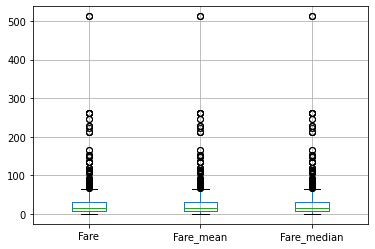

In [14]:
df[['Fare','Fare_mean','Fare_median']].boxplot()
plt.show()

**Negligible change in outlier quantity**

## **Using scikit-learn**
#### **Impute one column with mean and another with median using two simple imputers and a column transformer**

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [16]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [17]:
trf = ColumnTransformer([
                         ('median imputer',imputer1,['Age']),
                         ('mean imputer',imputer2,['Fare'])
],remainder = 'passthrough')

In [18]:
trf.fit(df)

ColumnTransformer(remainder='passthrough',
                  transformers=[('median imputer',
                                 SimpleImputer(strategy='median'), ['Age']),
                                ('mean imputer', SimpleImputer(), ['Fare'])])

In [19]:
trf.transform(df)

array([[22.        ,  7.25      ,  0.        , ..., 22.        ,
         7.25      ,  7.25      ],
       [38.        , 32.3288538 ,  1.        , ..., 38.        ,
        29.69911765, 28.        ],
       [26.        ,  7.925     ,  1.        , ..., 26.        ,
         7.925     ,  7.925     ],
       ...,
       [28.        , 23.45      ,  0.        , ..., 28.        ,
        23.45      , 23.45      ],
       [26.        , 30.        ,  1.        , ..., 26.        ,
        30.        , 30.        ],
       [32.        ,  7.75      ,  0.        , ..., 32.        ,
         7.75      ,  7.75      ]])

## **Arbitrary value imputation**

#### **Disadvantages**
> * Distribution shape can change
* Addition of extra outliers
* Change in correlation/covariance between columns

**USED:** When data is NOT missing completely at random (MNAR)

In [20]:
import random 
a,b = random.randint(-10,0),random.randint(10,100)
a,b

(-5, 60)

In [21]:
df['Age_1'] = df['Age'].fillna(a)
df['Age_2'] = df['Age'].fillna(b)

df['Fare_1'] = df['Fare'].fillna(a)
df['Fare_2'] = df['Fare'].fillna(b)

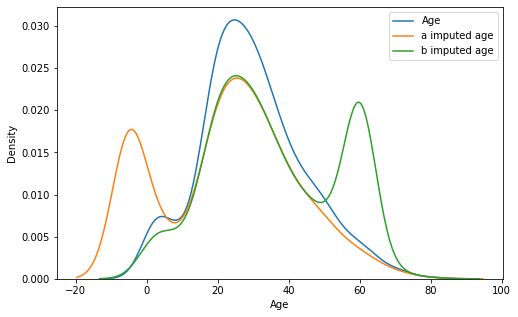

In [22]:
fig = plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)

sns.kdeplot(df['Age'],ax=ax)
sns.kdeplot(df['Age_1'],ax=ax)
sns.kdeplot(df['Age_2'],ax=ax)

plt.legend(['Age','a imputed age', 'b imputed age'])

plt.show()

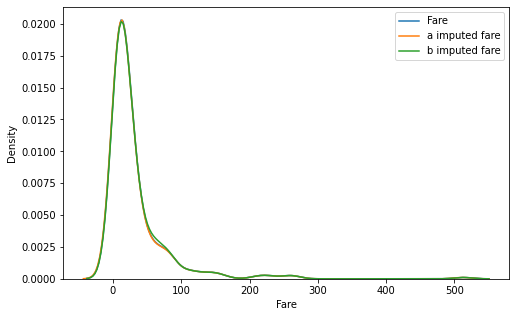

In [23]:
fig = plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)

sns.kdeplot(df['Fare'],ax=ax)
sns.kdeplot(df['Fare_1'],ax=ax)
sns.kdeplot(df['Fare_2'],ax=ax)

plt.legend(['Fare','a imputed fare', 'b imputed fare'])

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


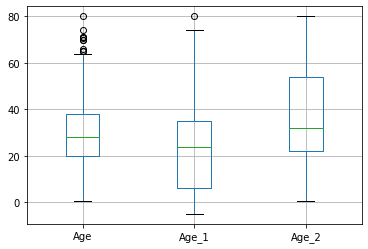

In [24]:
df[['Age','Age_1','Age_2']].boxplot()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


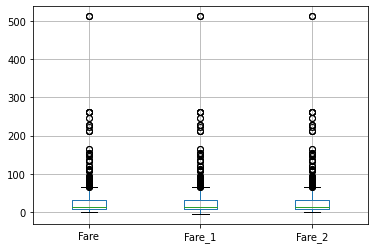

In [25]:
df[['Fare','Fare_1','Fare_2']].boxplot()

## **End of distribution imputation**

**USED:** When data is MNAR

#### **Disadvantages**
> * Distribution shape can change
* Addition of extra outliers
* Change in correlation/covariance between columns


* Missing value is imputed with mean+3*std OR mean-3*std

## **Random imputation**
(Fills NA values with random values taken from the dataset itself)

> * Preserves the variance of the data.
* Memory heavy for deployment, as we need to store the original training set to extract random values to be replaced in place of NA values in the coming observations.
* Doesn't distort the PDF, therefore it is well suited for linear models.

In [26]:
df['Age_imputed'] = df['Age']
df['Fare_imputed'] = df['Fare']

In [27]:
df['Age_imputed'][df['Age_imputed'].isnull()] = df['Age'].dropna().sample(df['Age'].isnull().sum()).values
df['Fare_imputed'][df['Fare_imputed'].isnull()] = df['Fare'].dropna().sample(df['Fare'].isnull().sum()).values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
df.head(10)

,Age,Fare,Survived,Age_mean,Age_median,Fare_mean,Fare_median,Age_1,Age_2,Fare_1,Fare_2,Age_imputed,Fare_imputed
0,22.0,7.2500,0,22.000000,22.0,7.250000,7.2500,22.0,22.0,7.2500,7.2500,22.0,7.2500
1,38.0,NaN,1,38.000000,38.0,29.699118,28.0000,38.0,38.0,-5.0000,60.0000,38.0,79.6500
2,26.0,7.9250,1,26.000000,26.0,7.925000,7.9250,26.0,26.0,7.9250,7.9250,26.0,7.9250
3,35.0,53.1000,1,35.000000,35.0,53.100000,53.1000,35.0,35.0,53.1000,53.1000,35.0,53.1000
4,35.0,8.0500,0,35.000000,35.0,8.050000,8.0500,35.0,35.0,8.0500,8.0500,35.0,8.0500
5,NaN,8.4583,0,29.699118,28.0,8.458300,8.4583,-5.0,60.0,8.4583,8.4583,38.0,8.4583
6,54.0,51.8625,0,54.000000,54.0,51.862500,51.8625,54.0,54.0,51.8625,51.8625,54.0,51.8625
7,2.0,21.0750,0,2.000000,2.0,21.075000,21.0750,2.0,2.0,21.0750,21.0750,2.0,21.0750
8,27.0,11.1333,1,27.000000,27.0,11.133300,11.1333,27.0,27.0,11.1333,11.1333,27.0,11.1333
9,14.0,30.0708,1,14.000000,14.0,30.070800,30.0708,14.0,14.0,30.0708,30.0708,14.0,30.0708


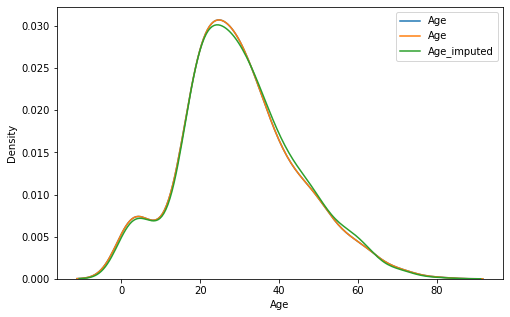

In [29]:
plot_dist('Age','Age','Age_imputed','Age','Age','Age_imputed')

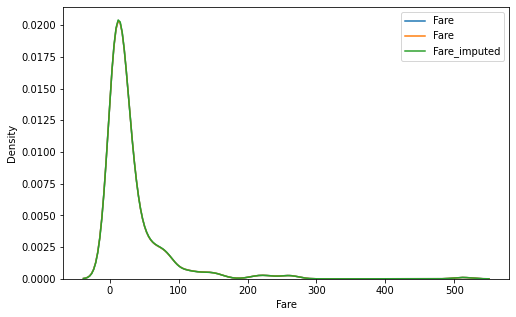

In [30]:
plot_dist('Fare','Fare','Fare_imputed','Fare','Fare','Fare_imputed')

## **Categorical values**

## **Imputation with mode**
* **Can't be used in case of high percentage of missing values**

In [35]:
df = pd.read_csv('house_price.csv')

In [36]:
df.head(4)

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [37]:
df = df[['GarageQual','FireplaceQu','SalePrice']]

In [38]:
df.isnull().mean()

GarageQual     0.055479
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

**Bar plot of Garage quality data**

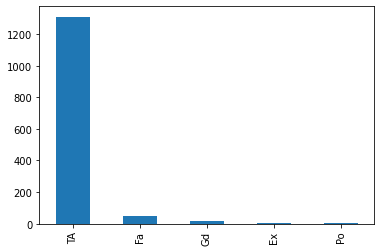

In [39]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()

#### **Replacing GarageQual missing values with mode and observing the change in distribution**

**Before imputation:**

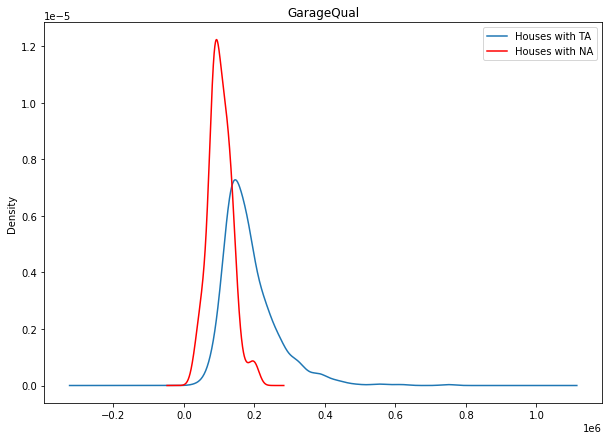

In [40]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Houses with TA','Houses with NA']
ax.legend(lines,labels,loc = 'best')

plt.title('GarageQual')
plt.show()

In [41]:
original_col = df[df['GarageQual']=='TA']['SalePrice']

In [42]:
df['GarageQual'].fillna('TA',inplace=True)

**After imputation:**

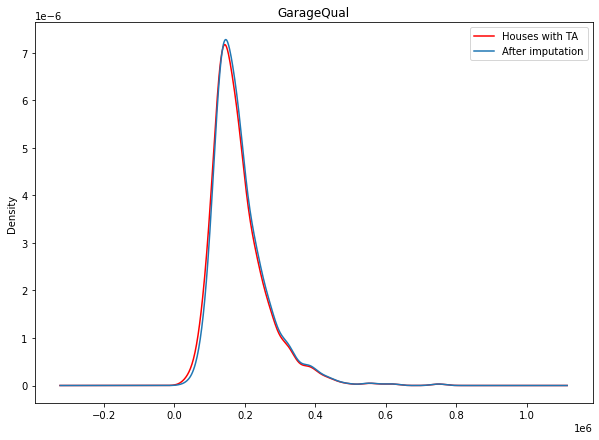

In [44]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')
original_col.plot(kind='kde',ax=ax)

lines,labels = ax.get_legend_handles_labels()
labels = ['Houses with TA','After imputation']
ax.legend(lines,labels,loc = 'best')

plt.title('GarageQual')
plt.show()

**Observation:** No significant change in distribution, as percentage of null values is less.

**Using scikit-learn**

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

mode_imputer = SimpleImputer(strategy = 'most_frequent')
X_train = mode_imputer.fit_transform(X_train)
X_test = mode_imputer.transform(X_test)

In [46]:
mode_imputer.statistics_

array(['TA', 'Gd'], dtype=object)

## **Missing category imputation**
* **Can be used when percentage of missing values is high but not very effective**

In [50]:
df = pd.read_csv('house_price.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

df['GarageQual'].fillna('Missing',inplace=True)

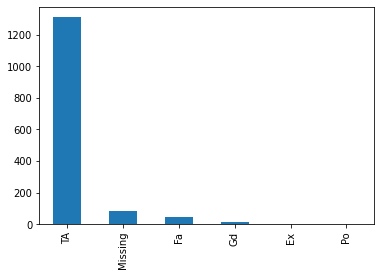

In [51]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()

**Observation:** A new category "Missing" has been created.

## **Other imputation techniques**
> * **Random imputation**
* Missing indicator

## **Random value imputation**
* Easy to implement
* Variance of data is retained due to randomness
* Can be useful in case of linear models because they demand that normal distributions remain intact

## **Missing Indicator**
* **Create a new column which contains "True" corresponding to a missing data and "False" corresponding to an existing data**

In [52]:
df = pd.read_csv('titanic/train.csv',usecols=['Age','Fare','Survived'])
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2)

In [53]:
from sklearn.impute import MissingIndicator

In [54]:
mi = MissingIndicator()
mi.fit(X_train)

MissingIndicator()

In [56]:
X_train_missing = mi.transform(X_train)
X_test_missing = mi.transform(X_test)

In [57]:
X_train['Age_NA'] = X_train_missing
X_test['Age_NA'] = X_test_missing

In [58]:
X_train.head()

,Age,Fare,Age_NA
104,37.0,7.9250,False
646,19.0,7.8958,False
786,18.0,7.4958,False
716,38.0,227.5250,False
279,35.0,20.2500,False
